In [0]:
import tensorflow as tf
from tensorflow import keras

#IMPORT FROM NOTEBOOK

In [0]:
# get access to the drive to get data and notebooks needed
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# path for the notebooks used
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
!pip install import-ipynb

In [0]:
# import the notebook that contains the data and functions for training 
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Using TensorFlow backend.


unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


### **VGG base model**

In [0]:
# base model for VGG16
def VGG16_model():
  model_VGG = keras.models.Sequential()
  model_VGG.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape = (256,256,3))) 
  model_VGG.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  

  model_VGG.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))   
  model_VGG.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2))) 

  model_VGG.add(keras.layers.Dropout(0.5)) 

  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  

  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  

  model_VGG.add(keras.layers.Dropout(0.5)) 

  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))  
  model_VGG.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))  

  # full VGG model with the classifier 
  model_VGG.add(keras.layers.Flatten())  
  model_VGG.add(keras.layers.Dense(units=4096 , activation = 'relu'))  
  model_VGG.add(keras.layers.Dropout(0.5))
  model_VGG.add(keras.layers.Dense(units=4096 , activation = 'relu'))  
  model_VGG.add(keras.layers.Dropout(0.5))
  model_VGG.add(keras.layers.Dense(units=1 , activation = 'sigmoid')) 
  
  # compile the model using adam optimizer with learning rate = 10^-4 
  model_VGG.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4) ,metrics=['acc']) 

  return model_VGG

In [0]:
VGG16_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0

#Training Extractor

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.2311 - acc: 0.7719
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 709ms/step - loss: 1.2311 - acc: 0.7719 - val_loss: 0.6815 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4728 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 233ms/step - loss: 0.4728 - acc: 0.8083 - val_loss: 0.6555 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4685 - acc: 0.8053
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 232ms/step - loss: 0.4685 - acc: 0.8053 - val_loss: 0.6784 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4550 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

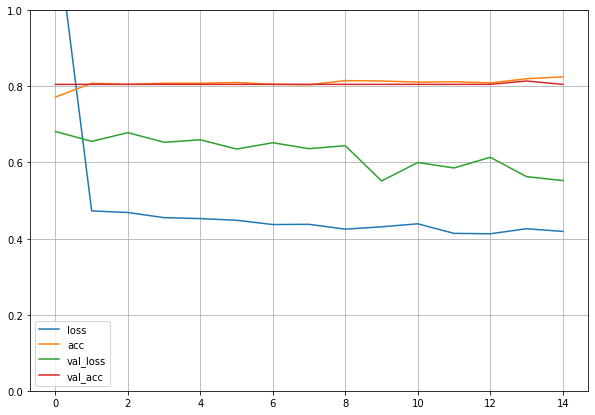

In [0]:
# with many dropouts
model1 = VGG16_model()
train_extractor(model1,data.vgg,data.axial,data.abnormal) 

In [0]:
model_temp =  load_model(data.vgg,data.axial,data.abnormal,data.extractor)
list1 = test_extractor(model_temp,data.axial,data.abnormal)

4/4 [==============================] - 1s 210ms/step - loss: 1.9590 - acc: 0.8000


Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.8053 - acc: 0.6942
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 35s 688ms/step - loss: 1.8053 - acc: 0.6942 - val_loss: 0.5646 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.4342 - acc: 0.6903
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 1.4342 - acc: 0.6903 - val_loss: 0.5640 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.3074 - acc: 0.7089
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 1.3074 - acc: 0.7089 - val_loss: 0.5606 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 1.1781 - acc: 0.7355
Epoch 00004: val_acc did not improve from 0.8

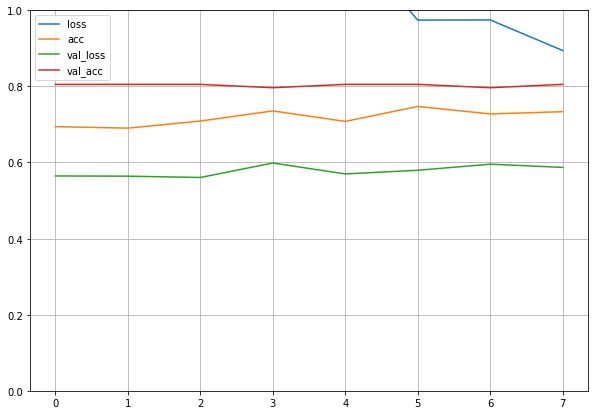

In [0]:
# lr = 10^-6
model4 = VGG16_model()                                    
train_extractor(model4,data.vgg,data.axial,data.abnormal) 

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6391 - acc: 0.8004
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 37s 717ms/step - loss: 0.6391 - acc: 0.8004 - val_loss: 0.6094 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4895 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4895 - acc: 0.8083 - val_loss: 0.5291 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4656 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4656 - acc: 0.8083 - val_loss: 0.5031 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4524 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

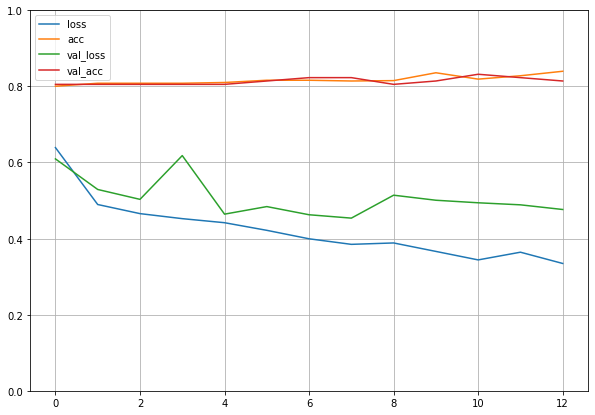

In [0]:
#remove some dropouts and lr = 10^-4    # best till now
model12 = VGG16_model()
train_extractor(model12,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.7644 - acc: 0.7945
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 33s 642ms/step - loss: 0.7644 - acc: 0.7945 - val_loss: 0.6042 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4809 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4809 - acc: 0.8083 - val_loss: 0.6170 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4703 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 227ms/step - loss: 0.4703 - acc: 0.8083 - val_loss: 0.5829 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4563 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

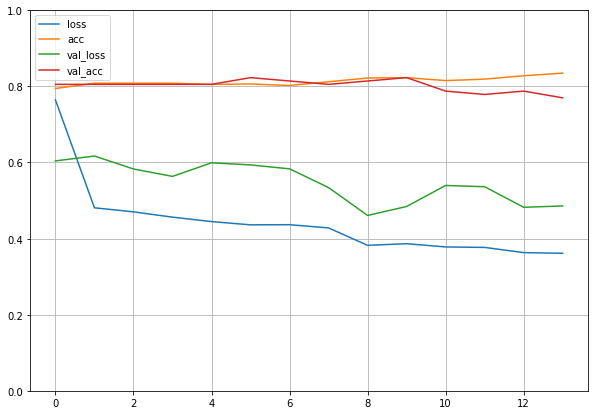

In [0]:
# add dropout layer
model14 = VGG16_model()
train_extractor(model14,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.6653 - acc: 0.7237
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 708ms/step - loss: 1.6653 - acc: 0.7237 - val_loss: 0.6329 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.9078 - acc: 0.7237
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 230ms/step - loss: 0.9078 - acc: 0.7237 - val_loss: 0.6676 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6673 - acc: 0.7375
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 36s 696ms/step - loss: 0.6673 - acc: 0.7375 - val_loss: 0.6627 - val_acc: 0.8142
Epoch 4/50
51/51 [==============================

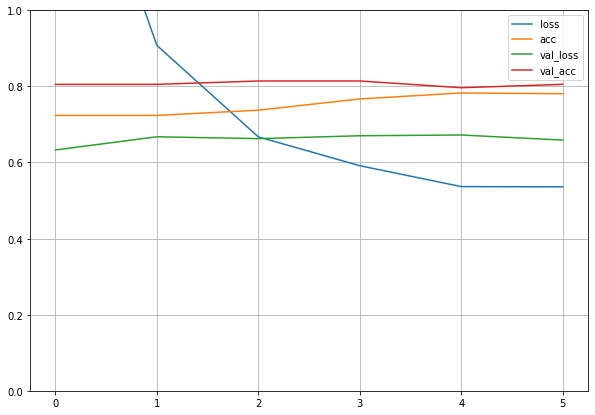

In [0]:
# decrease learning rate and set all dropout layers
model13 = VGG16_model()
train_extractor(model13,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 84.8062 - acc: 0.8004
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 87s 2s/step - loss: 84.8062 - acc: 0.8004 - val_loss: 58.1780 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 42.2052 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 42.2052 - acc: 0.8083 - val_loss: 29.4401 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 22.0209 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 22.0209 - acc: 0.8083 - val_loss: 16.0686 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 12.4238 - acc: 0.8083
Epoch 00004: val_acc did not improve f

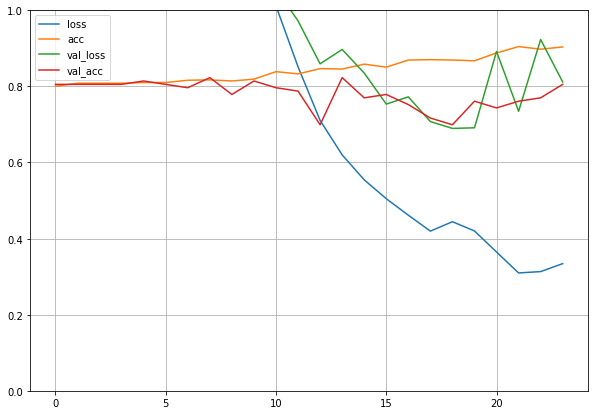

In [0]:
#kernel regulaizer 0.01
model15 = VGG16_model()
train_extractor(model15,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 10.6266 - acc: 0.7915
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 35s 682ms/step - loss: 10.6266 - acc: 0.7915 - val_loss: 9.3559 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 8.3546 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 8.3546 - acc: 0.8083 - val_loss: 7.6925 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 7.0095 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 242ms/step - loss: 7.0095 - acc: 0.8083 - val_loss: 6.5902 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 6.0653 - acc: 0.8102
Epoch 00004: val_acc improved from 0.80531 

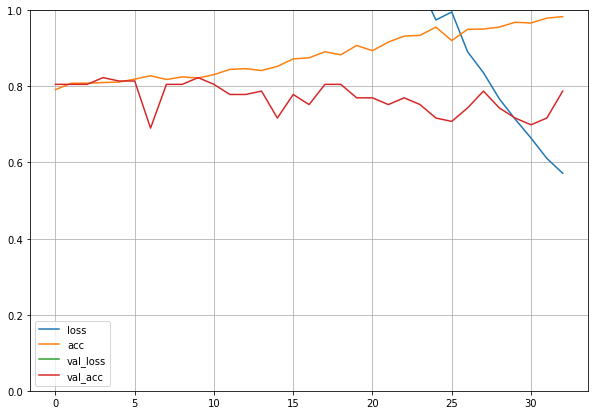

In [0]:
#kernel regulaizer 0.001
model16 = VGG16_model()
train_extractor(model16,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.6518 - acc: 0.8014
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 33s 656ms/step - loss: 1.6518 - acc: 0.8014 - val_loss: 1.6074 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.4275 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 241ms/step - loss: 1.4275 - acc: 0.8083 - val_loss: 1.4952 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.3027 - acc: 0.8083
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 42s 832ms/step - loss: 1.3027 - acc: 0.8083 - val_loss: 1.3050 - val_acc: 0.8142
Epoch 4/50
51/51 [==============================

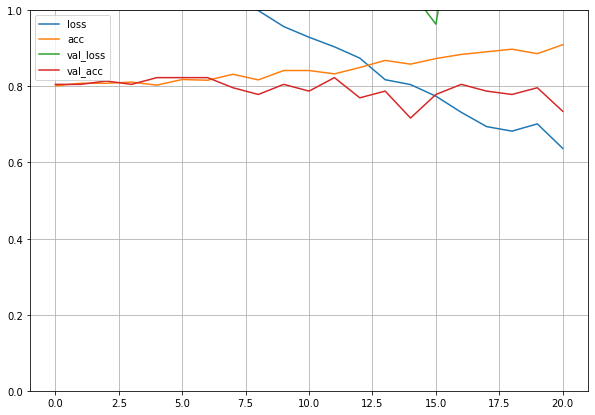

In [0]:
#kernel regulaizer 0.0001
model17 = VGG16_model()
train_extractor(model17,data.vgg,data.axial,data.abnormal)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 9.8374 - acc: 0.8083
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 37s 718ms/step - loss: 9.8374 - acc: 0.8083 - val_loss: 7.7609 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 6.5448 - acc: 0.8073
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 240ms/step - loss: 6.5448 - acc: 0.8073 - val_loss: 5.5070 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 4.7755 - acc: 0.8210
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 12s 240ms/step - loss: 4.7755 - acc: 0.8210 - val_loss: 4.2539 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 3.8007 - acc: 0.8112
Epoch 00004: val_acc improved from 0.80531 to

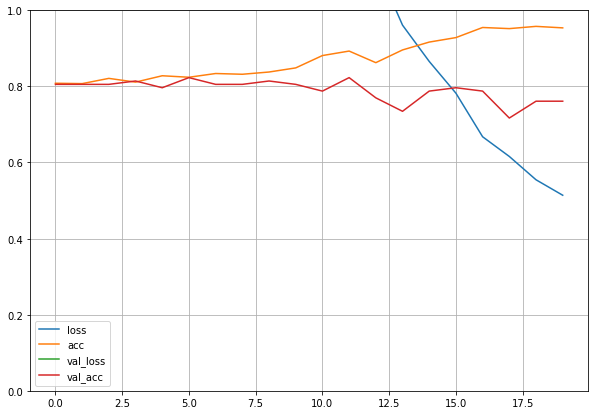

In [0]:
#kernel regulaizer 0.001 and remove all dropouts
model18 = VGG16_model()
train_extractor(model18,data.vgg,data.axial,data.abnormal)

# Axial Abnormal 

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6434 - acc: 0.7974
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_abnormal.h5
51/51 [==============================] - 42s 832ms/step - loss: 0.6434 - acc: 0.7974 - val_loss: 0.5545 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4924 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 19s 377ms/step - loss: 0.4924 - acc: 0.8083 - val_loss: 0.5753 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4823 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 18s 354ms/step - loss: 0.4823 - acc: 0.8083 - val_loss: 0.5361 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4723 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

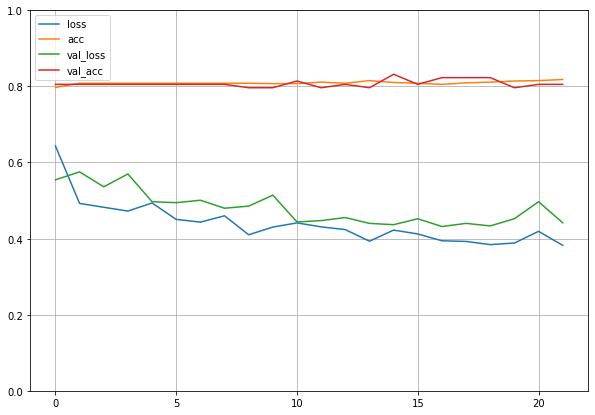

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.abnormal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.axial,processing.abnormal)

4/4 [==============================] - 0s 71ms/step - loss: 0.4750 - acc: 0.8167


#Axial ACL

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - 52s 1s/step - loss: 0.7535 - accuracy: 0.7788 - val_loss: 0.5125 - val_accuracy: 0.8496
Epoch 2/50
51/51 [==============================] - 44s 872ms/step - loss: 0.4920 - accuracy: 0.8122 - val_loss: 0.5438 - val_accuracy: 0.8496
Epoch 3/50
51/51 [==============================] - 44s 871ms/step - loss: 0.5005 - accuracy: 0.8122 - val_loss: 0.5479 - val_accuracy: 0.8496
Epoch 4/50
51/51 [==============================] - 45s 875ms/step - loss: 0.4905 - accuracy: 0.8122 - val_loss: 0.5307 - val_accuracy: 0.8496
Epoch 5/50
51/51 [==============================] - 45s 875ms/step - loss: 0.4934 - accuracy: 0.8122 - val_loss: 0.4694 - val_accuracy: 0.8496
Epoch 6/50
51/51 [==============================] - 45s 873ms/step - loss: 0.4849 - accuracy: 0.8122 - val_loss: 0.4445 - val_accuracy: 0.8496
Epoch 7/50
51/51 [==============================] - 45s 873ms/step - 

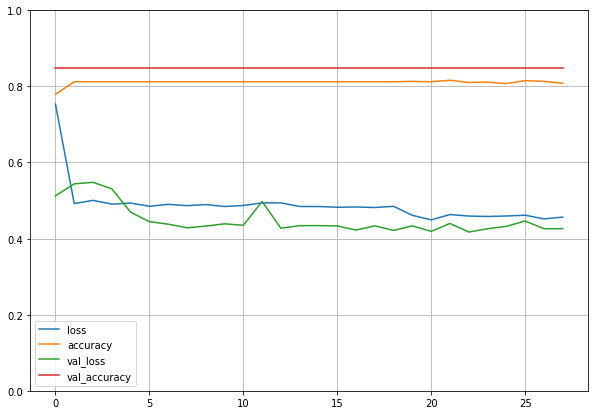

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.acl)

In [0]:
model_temp2 =processing.load_model(processing.vgg,processing.axial,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp2,processing.axial,processing.acl)

4/4 [==============================] - 3s 744ms/step - loss: 0.6873 - acc: 0.5500


# Axial Meniscal

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.7857 - acc: 0.6273
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/axial_meniscus.h5
51/51 [==============================] - 92s 2s/step - loss: 0.7857 - acc: 0.6273 - val_loss: 0.6547 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6638 - acc: 0.6470
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 20s 384ms/step - loss: 0.6638 - acc: 0.6470 - val_loss: 0.6566 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6594 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 18s 357ms/step - loss: 0.6594 - acc: 0.6470 - val_loss: 0.6504 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA: 0s -

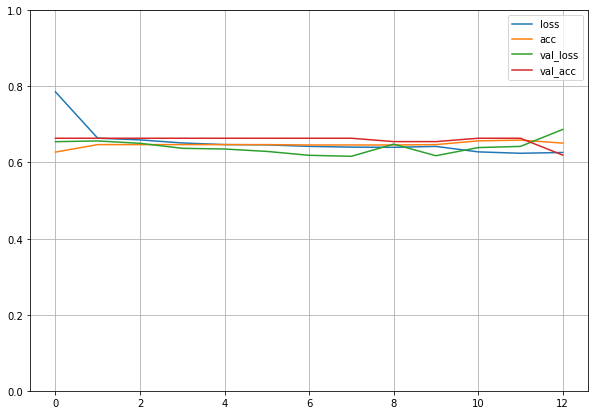

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.axial,processing.meniscal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.axial,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.axial,processing.meniscal)

4/4 [==============================] - 1s 220ms/step - loss: 0.6865 - acc: 0.5667


# Saggital Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6186 - acc: 0.7837
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_abnormal.h5
51/51 [==============================] - 65s 1s/step - loss: 0.6186 - acc: 0.7837 - val_loss: 0.5916 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4973 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 44s 865ms/step - loss: 0.4973 - acc: 0.8083 - val_loss: 0.5646 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4817 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 43s 853ms/step - loss: 0.4817 - acc: 0.8083 - val_loss: 0.5761 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4852 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.8

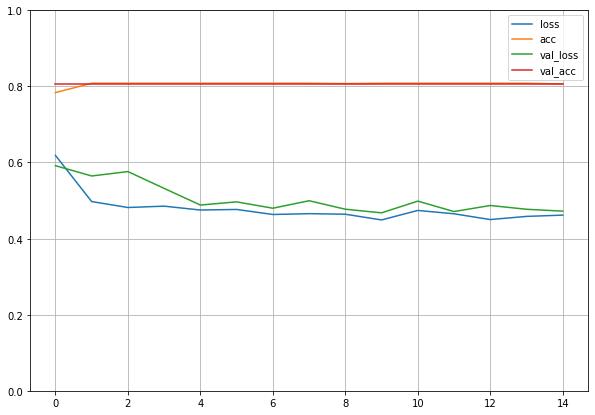

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.abnormal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.abnormal)

4/4 [==============================] - 3s 851ms/step - loss: 0.5990 - acc: 0.7917


#Saggital ACL

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6469 - acc: 0.8063
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_acl.h5
51/51 [==============================] - 69s 1s/step - loss: 0.6469 - acc: 0.8063 - val_loss: 0.5640 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4974 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 46s 908ms/step - loss: 0.4974 - acc: 0.8122 - val_loss: 0.5152 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5065 - acc: 0.8122
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 46s 908ms/step - loss: 0.5065 - acc: 0.8122 - val_loss: 0.4875 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4900 - acc: 0.8122
Epoch 00004: val_acc did not improve from 0.84956


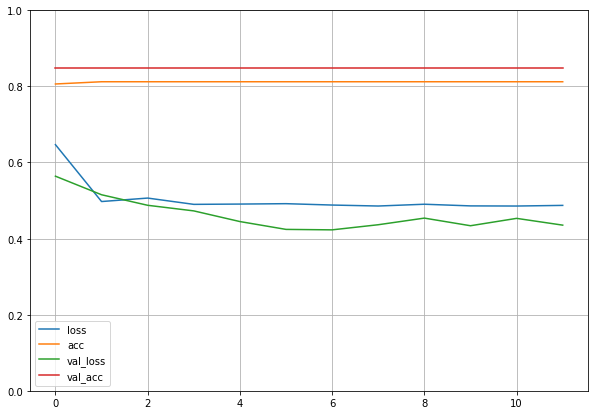

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.acl)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.acl)

4/4 [==============================] - 3s 867ms/step - loss: 0.6891 - acc: 0.5500


#Saggital Meniscal

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.8979 - acc: 0.6155
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/sagittal_meniscus.h5
51/51 [==============================] - 83s 2s/step - loss: 0.8979 - acc: 0.6155 - val_loss: 0.6729 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6624 - acc: 0.6470
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 44s 855ms/step - loss: 0.6624 - acc: 0.6470 - val_loss: 0.6600 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6628 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 44s 855ms/step - loss: 0.6628 - acc: 0.6470 - val_loss: 0.6509 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA: 0

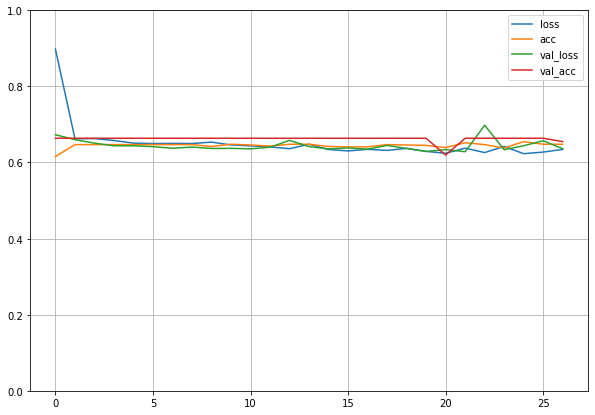

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.sagittal,processing.meniscal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.sagittal,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.sagittal,processing.meniscal)

4/4 [==============================] - 3s 836ms/step - loss: 0.6856 - acc: 0.5667


#Coronal Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6521 - acc: 0.7925
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_abnormal.h5
51/51 [==============================] - 63s 1s/step - loss: 0.6521 - acc: 0.7925 - val_loss: 0.5788 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5216 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 44s 866ms/step - loss: 0.5216 - acc: 0.8083 - val_loss: 0.5502 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5045 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 44s 869ms/step - loss: 0.5045 - acc: 0.8083 - val_loss: 0.5410 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4890 - acc: 0.8083
Epoch 00004: val_acc did not improve from 0.80

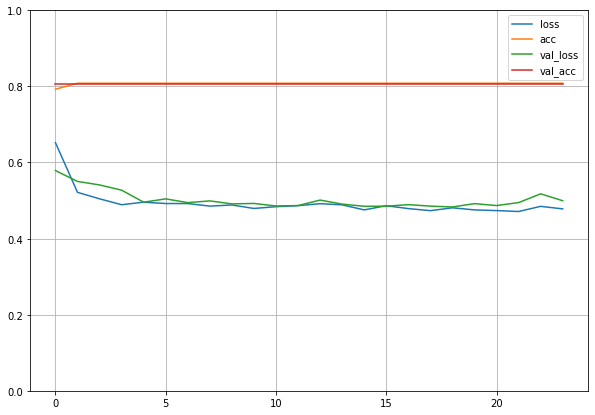

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.abnormal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.abnormal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.abnormal)

4/4 [==============================] - 1s 275ms/step - loss: 0.5819 - acc: 0.7917


#Coronal ACL

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6544 - acc: 0.8014
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_acl.h5
51/51 [==============================] - 74s 1s/step - loss: 0.6544 - acc: 0.8014 - val_loss: 0.6527 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5079 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 44s 870ms/step - loss: 0.5079 - acc: 0.8122 - val_loss: 0.5108 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4969 - acc: 0.8122
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 44s 870ms/step - loss: 0.4969 - acc: 0.8122 - val_loss: 0.4883 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s - lo

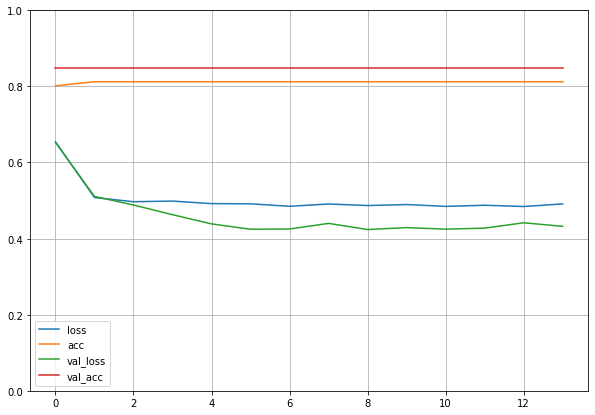

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.acl)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.acl,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.acl)

4/4 [==============================] - 3s 844ms/step - loss: 0.6894 - acc: 0.5500


# Coronal Meniscal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.7709 - acc: 0.5988
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Extractor/coronal_meniscus.h5
51/51 [==============================] - 68s 1s/step - loss: 0.7709 - acc: 0.5988 - val_loss: 0.6588 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6569 - acc: 0.6470
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 44s 869ms/step - loss: 0.6569 - acc: 0.6470 - val_loss: 0.6617 - val_acc: 0.6637
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6501 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 44s 869ms/step - loss: 0.6501 - acc: 0.6470 - val_loss: 0.6738 - val_acc: 0.6637
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.6564 - acc: 0.6470
Epoch 00004: val_acc did not improve from 0.66

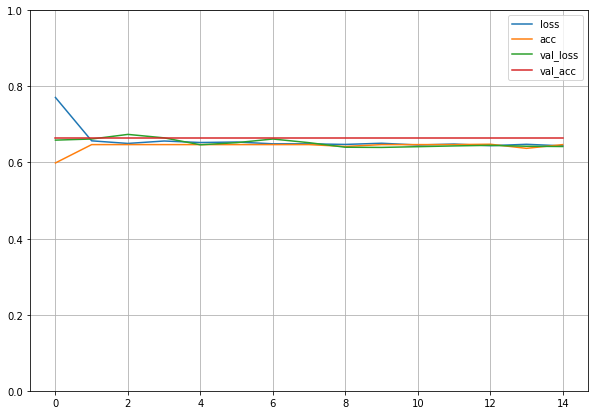

In [0]:
model1 = VGG16_model()
processing.train_extractor(model1,processing.vgg,processing.coronal,processing.meniscal)

In [0]:
model_temp1 =processing.load_model(processing.vgg,processing.coronal,processing.meniscal,processing.extractor)
list1 = processing.test_extractor(model_temp1,processing.coronal,processing.meniscal)

4/4 [==============================] - 1s 275ms/step - loss: 0.6838 - acc: 0.5667
